2022-01-11 <br/>
Bee Colony Losses <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-01-11/readme.md

Animated Hexbin Plot - Completed

https://plotly.com/python/hexbin-mapbox/

In [86]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [87]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-11/colony.csv')

In [88]:
df.head()

,year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct
0,2015,January-March,Alabama,7000.0,7000.0,1800.0,26.0,2800.0,250.0,4.0
1,2015,January-March,Arizona,35000.0,35000.0,4600.0,13.0,3400.0,2100.0,6.0
2,2015,January-March,Arkansas,13000.0,14000.0,1500.0,11.0,1200.0,90.0,1.0
3,2015,January-March,California,1440000.0,1690000.0,255000.0,15.0,250000.0,124000.0,7.0
4,2015,January-March,Colorado,3500.0,12500.0,1500.0,12.0,200.0,140.0,1.0


In [93]:
df["cololny_net"]= df.colony_n + df.colony_added - df.colony_lost
df["colony_net_pct"] = round((df.cololny_net - df.colony_n ) *100/ df.colony_n,1)

In [94]:
# Pulling the states coordinates 
# Special thanks to jasperdebie   : https://github.com/jasperdebie/VisInfo

df_state = pd.read_csv('https://raw.githubusercontent.com/jasperdebie/VisInfo/master/us-state-capitals.csv')

df_state.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [95]:
df_combined= df.merge(df_state, how='left', left_on='state',right_on='name', validate="many_to_one")

In [96]:
df_combined.head()

,year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct,cololny_net,colony_net_pct,name,description,latitude,longitude
0,2015,January-March,Alabama,7000.0,7000.0,1800.0,26.0,2800.0,250.0,4.0,8000.0,14.3,Alabama,Montgomery,32.377716,-86.300568
1,2015,January-March,Arizona,35000.0,35000.0,4600.0,13.0,3400.0,2100.0,6.0,33800.0,-3.4,Arizona,Phoenix,33.448143,-112.096962
2,2015,January-March,Arkansas,13000.0,14000.0,1500.0,11.0,1200.0,90.0,1.0,12700.0,-2.3,Arkansas,Little Rock,34.746613,-92.288986
3,2015,January-March,California,1440000.0,1690000.0,255000.0,15.0,250000.0,124000.0,7.0,1435000.0,-0.3,California,Sacramento,38.576668,-121.493629
4,2015,January-March,Colorado,3500.0,12500.0,1500.0,12.0,200.0,140.0,1.0,2200.0,-37.1,Colorado,Denver,39.739227,-104.984856


In [97]:
df_grouped = df_combined.groupby(['year','state','latitude','longitude'])[['cololny_net','colony_net_pct']].agg(['mean'])

In [98]:
df_grouped.head()

cololny_net colony_net_pct
                                             mean           mean
year state      latitude  longitude                             
2015 Alabama    32.377716 -86.300568       7817.5           1.75
     Arizona    33.448143 -112.096962     36525.0           2.45
     Arkansas   34.746613 -92.288986      18200.0           7.40
     California 38.576668 -121.493629    968750.0          -3.40
     Colorado   39.739227 -104.984856     17275.0          -2.45

In [99]:
# rename columns 
newidx = []
for (n1,n2) in df_grouped.columns.ravel():
    newidx.append("%s_%s" % (n1,n2))
df_grouped.columns=newidx

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



In [100]:
df_cleaned= df_grouped.reset_index()

In [101]:
df_cleaned.head()

,year,state,latitude,longitude,cololny_net_mean,colony_net_pct_mean
0,2015,Alabama,32.377716,-86.300568,7817.5,1.75
1,2015,Arizona,33.448143,-112.096962,36525.0,2.45
2,2015,Arkansas,34.746613,-92.288986,18200.0,7.40
3,2015,California,38.576668,-121.493629,968750.0,-3.40
4,2015,Colorado,39.739227,-104.984856,17275.0,-2.45


In [46]:
df_cleaned.tail()

,year,state,latitude,longitude,cololny_net_mean,colony_net_pct_mean
310,2021,Virginia,37.538857,-77.433640,9235.0,82.15
311,2021,Washington,47.035805,-122.905014,60050.0,96.00
312,2021,West Virginia,38.336246,-81.612328,8615.0,87.75
313,2021,Wisconsin,43.074684,-89.384445,39150.0,85.40
314,2021,Wyoming,41.140259,-104.820236,14700.0,93.45


In [109]:
df_cleaned_pct=df_cleaned.loc[:, df_cleaned.columns != 'cololny_net_mean']

In [112]:
df_cleaned_pct.colony_net_pct_mean.max()

197.0

In [115]:
df_cleaned.head()

,year,state,latitude,longitude,cololny_net_mean,colony_net_pct_mean
0,2015,Alabama,32.377716,-86.300568,7817.5,1.75
1,2015,Arizona,33.448143,-112.096962,36525.0,2.45
2,2015,Arkansas,34.746613,-92.288986,18200.0,7.40
3,2015,California,38.576668,-121.493629,968750.0,-3.40
4,2015,Colorado,39.739227,-104.984856,17275.0,-2.45


In [136]:
# Building an animated hexbin chart
import plotly.figure_factory as ff
import plotly.express as px


px.set_mapbox_access_token("carto-darkmatter")


fig = ff.create_hexbin_mapbox(
    df_cleaned[df_cleaned.year.isin([2015,2018,2020])], lat='latitude', lon='longitude', nx_hexagon=15, color='colony_net_pct_mean', animation_frame='year',
    color_continuous_scale="icefire", labels={"color": "Net Growth %", "frame": "Period"}, title= "I Bee-lieve in growth",
    opacity=0.5, min_count=1,
    show_original_data=True, original_data_marker=dict(opacity=0.6, size=4, color="deeppink")
)
fig.update_layout(margin=dict(b=0, t=0, l=0, r=0), mapbox_style= "carto-positron")
fig.layout.sliders[0].pad.t=20
fig.layout.updatemenus[0].pad.t=40
fig.show()

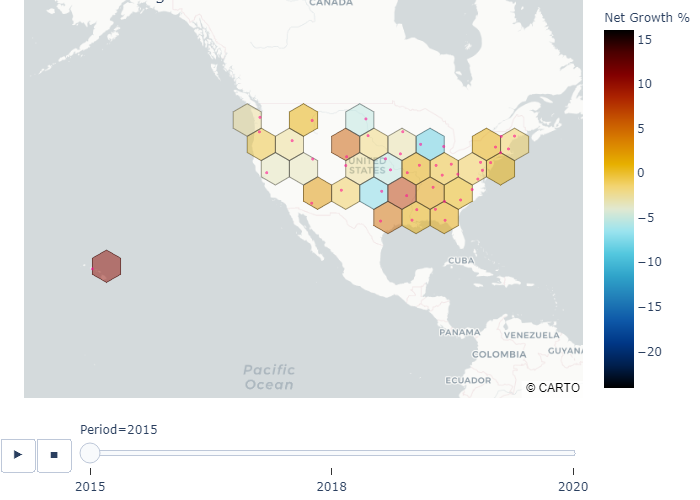

In [135]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
